dataset :  https://www.kaggle.com/datasets/abdallahwagih/mall-customers-segmentation

In [53]:
import pandas as pd

In [54]:
dataset = pd.read_csv("Mall_Customers.csv")

In [55]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [56]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [57]:
df = dataset.drop('CustomerID', axis=1)
df['Genre'] = df['Genre'].map({'Male': 0, 'Female': 1})
features = df[['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]


In [58]:
features.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [59]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()

features_st = minmax.fit_transform(features)

features_st = pd.DataFrame(features_st, columns=features.columns)


In [60]:
features_st.head()


,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0.0,0.019231,0.000000,0.387755
1,0.0,0.057692,0.000000,0.816327
2,1.0,0.038462,0.008197,0.051020
3,1.0,0.096154,0.008197,0.775510
4,1.0,0.250000,0.016393,0.397959


In [61]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


ELBOW POINT

In [62]:
inertia = [] 

for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_st)
    inertia.append(kmeans.inertia_)


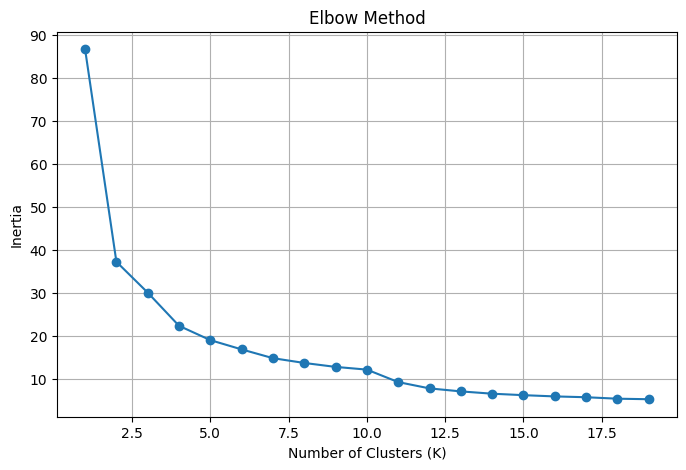

In [63]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 20), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


چون 18 نسبت به اندازه دیتاست (200 نفر) عدد بالایی محسوب می‌شه، الان لازمه با روش دوم: Silhouette Score بررسی کنیم که واقعاً خوشه‌بندی با 18 خوشه کیفیت خوبی داره یا نه.

Silhouette Score

In [64]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 18):  
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(features_st)
    score = silhouette_score(features_st, labels)
    silhouette_scores.append(score)


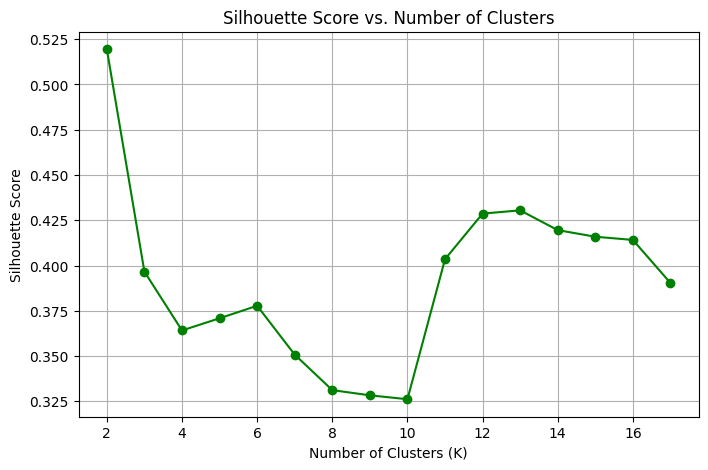

In [65]:
plt.figure(figsize=(8, 5))
plt.plot(range(2, 18), silhouette_scores, marker='o', color='green')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


K=2 → بالاترین امتیاز → خوشه‌بندی ساده ولی خیلی واضح

K=6 → امتیاز نسبتاً خوب → شاید تفکیک دقیق‌تر با جزئیات بیشتر

K=13 → نسبتاً بالا → خوشه‌بندی پیچیده‌تر

In [66]:
from sklearn.cluster import KMeans


In [72]:
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(features_st)


In [73]:
df['Cluster'] = clusters


In [74]:
print(df.head())


   Genre  Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0      0   19                  15                      39        0
1      0   21                  15                      81        0
2      1   20                  16                       6        1
3      1   23                  16                      77        1
4      1   31                  17                      40        1


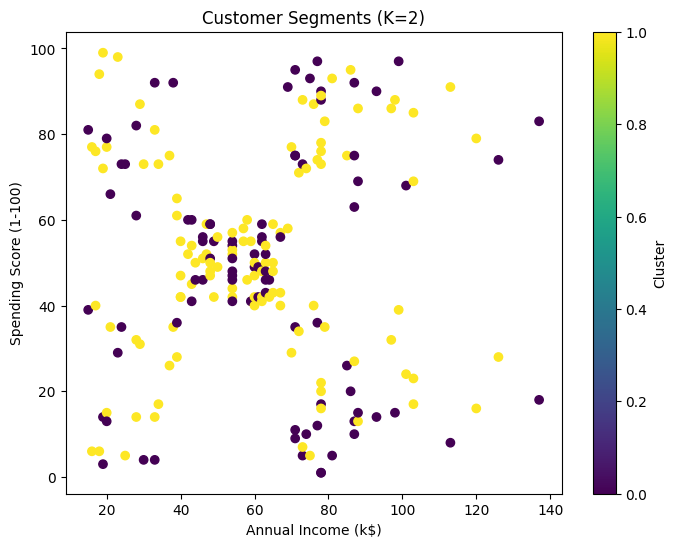

In [75]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments (K=2)')
plt.colorbar(label='Cluster')
plt.show()



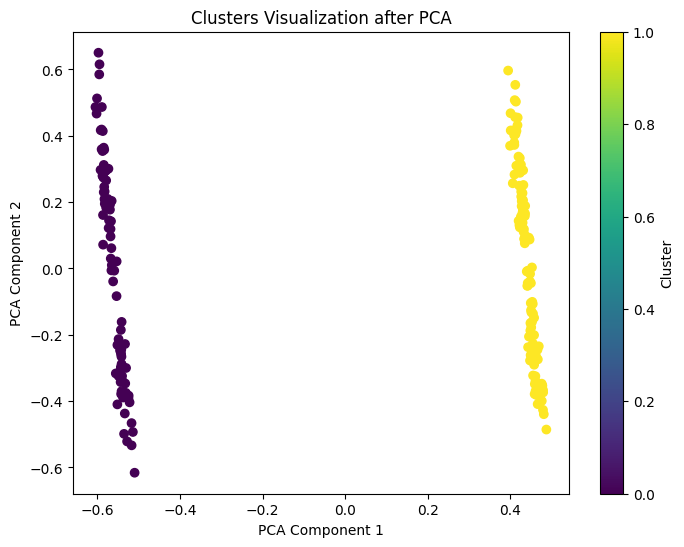

In [76]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

features_pca = pca.fit_transform(features_st)


plt.figure(figsize=(8,6))
plt.scatter(features_pca[:,0], features_pca[:,1], c=df['Cluster'], cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clusters Visualization after PCA')
plt.colorbar(label='Cluster')
plt.show()


In [77]:
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)


         Genre        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                              
0          0.0  39.806818           62.227273               48.511364
1          1.0  38.098214           59.250000               51.526786


DB SCAN

In [78]:
from sklearn.cluster import DBSCAN


In [81]:
features_st.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0.0,0.019231,0.000000,0.387755
1,0.0,0.057692,0.000000,0.816327
2,1.0,0.038462,0.008197,0.051020
3,1.0,0.096154,0.008197,0.775510
4,1.0,0.250000,0.016393,0.397959


In [92]:
dbscan = DBSCAN(eps=0.3, min_samples=5)
clusters_db = dbscan.fit_predict(features_st)
df['DBSCAN_Cluster'] = clusters_db


In [93]:
df['DBSCAN_Cluster'] = clusters_db
print(df['DBSCAN_Cluster'].value_counts())


DBSCAN_Cluster
 1    112
 0     84
-1      4
Name: count, dtype: int64


In [94]:
print(df[df['DBSCAN_Cluster'] == -1])


     Genre  Age  Annual Income (k$)  Spending Score (1-100)  Cluster  \
8        0   64                  19                       3        0   
10       0   67                  19                      14        0   
30       0   60                  30                       4        0   
199      0   30                 137                      83        0   

     DBSCAN_Cluster  
8                -1  
10               -1  
30               -1  
199              -1  


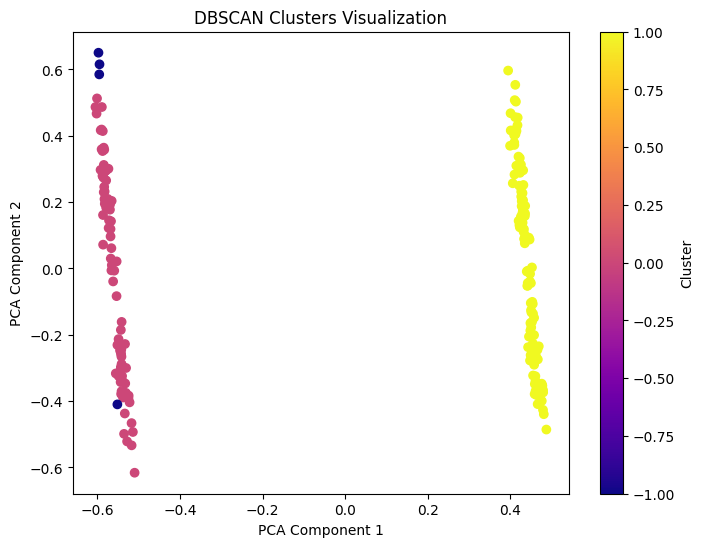

In [95]:
plt.figure(figsize=(8,6))
plt.scatter(features_pca[:,0], features_pca[:,1], c=df['DBSCAN_Cluster'], cmap='plasma')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('DBSCAN Clusters Visualization')
plt.colorbar(label='Cluster')
plt.show()


In [96]:
cluster_summary_dbscan = df.groupby('DBSCAN_Cluster').mean()
print(cluster_summary_dbscan)


                Genre        Age  Annual Income (k$)  Spending Score (1-100)  \
DBSCAN_Cluster                                                                 
-1                0.0  55.250000               51.25               26.000000   
 0                0.0  39.071429               62.75               49.583333   
 1                1.0  38.098214               59.25               51.526786   

                Cluster  
DBSCAN_Cluster           
-1                  0.0  
 0                  0.0  
 1                  1.0  
